In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/EcommercePurchases.csv")

In [4]:
df.head()

Address    Lot AM or PM  \
0  16629 Pace Camp Apt. 448\nAlexisborough, NE 77...  46 in       PM   
1  9374 Jasmine Spurs Suite 508\nSouth John, TN 8...  28 rn       PM   
2                   Unit 0065 Box 5052\nDPO AP 27450  94 vE       PM   
3              7780 Julia Fords\nNew Stacy, WA 45798  36 vm       PM   
4  23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...  20 IE       AM   

                                        Browser Info  \
0  Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...   
1  Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...   
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...   
3  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...   
4  Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...   

                           Company       Credit Card CC Exp Date  \
0                  Martinez-Herman  6011929061123406       02/20   
1  Fletcher, Richards and Whitaker  3337758169645356       11/18   
2       Simpson, Williams and Pham      675957666125       08/19   
3  Williams, Marshall and Buchanan  6011578504430710       02/24   
4        Brown, Watson and Andrews  6011456623207998       10/25   

   CC Security Code                  CC Provider  \
0               900                 JCB 16 digit   
1               561                   Mastercard   
2               699                 JCB 16 digit   
3               384                     Discover   
4               678  Diners Club / Carte Blanche   

                            Email                                     Job  \
0               pdunlap@yahoo.com  Scientist, product/process development   
1              anthony41@reed.com                       Drilling engineer   
2  amymiller@morales-harrison.com                Customer service manager   
3     brent16@olson-robinson.info                       Drilling engineer   
4     christopherwright@gmail.com                             Fine artist   

        IP Address Language  Purchase Price  
0  149.146.147.205       el           98.14  
1     15.160.41.51       fr           70.73  
2   132.207.160.22       de            0.95  
3     30.250.74.19       es           78.04  
4     24.140.33.94       es           77.82

In [7]:
type("test")


str

In [8]:
len(df)

10000

In [9]:
np.mean(df["Purchase Price"])

50.34730200000025

In [10]:
mean_price = df.groupby('Job').agg({
                'Purchase Price': 'mean'
            })

In [11]:
mean_price.head()

Purchase Price
Job                                             
Academic librarian                     47.951818
Accommodation manager                  37.038235
Accountant, chartered                  52.565500
Accountant, chartered certified        57.945000
Accountant, chartered management       69.082667

In [12]:
mean_price["Job"] = mean_price.index

In [13]:
mean_price

Purchase Price  \
Job                                                
Academic librarian                     47.951818   
Accommodation manager                  37.038235   
Accountant, chartered                  52.565500   
Accountant, chartered certified        57.945000   
Accountant, chartered management       69.082667   
...                                          ...   
Water quality scientist                46.526111   
Web designer                           59.764500   
Wellsite geologist                     51.309167   
Writer                                 44.863000   
Youth worker                           40.513333   

                                                               Job  
Job                                                                 
Academic librarian                              Academic librarian  
Accommodation manager                        Accommodation manager  
Accountant, chartered                        Accountant, chartered  
Accountant, chartered certified    Accountant, chartered certified  
Accountant, chartered management  Accountant, chartered management  
...                                                            ...  
Water quality scientist                    Water quality scientist  
Web designer                                          Web designer  
Wellsite geologist                              Wellsite geologist  
Writer                                                      Writer  
Youth worker                                          Youth worker  

[623 rows x 2 columns]

# Viz

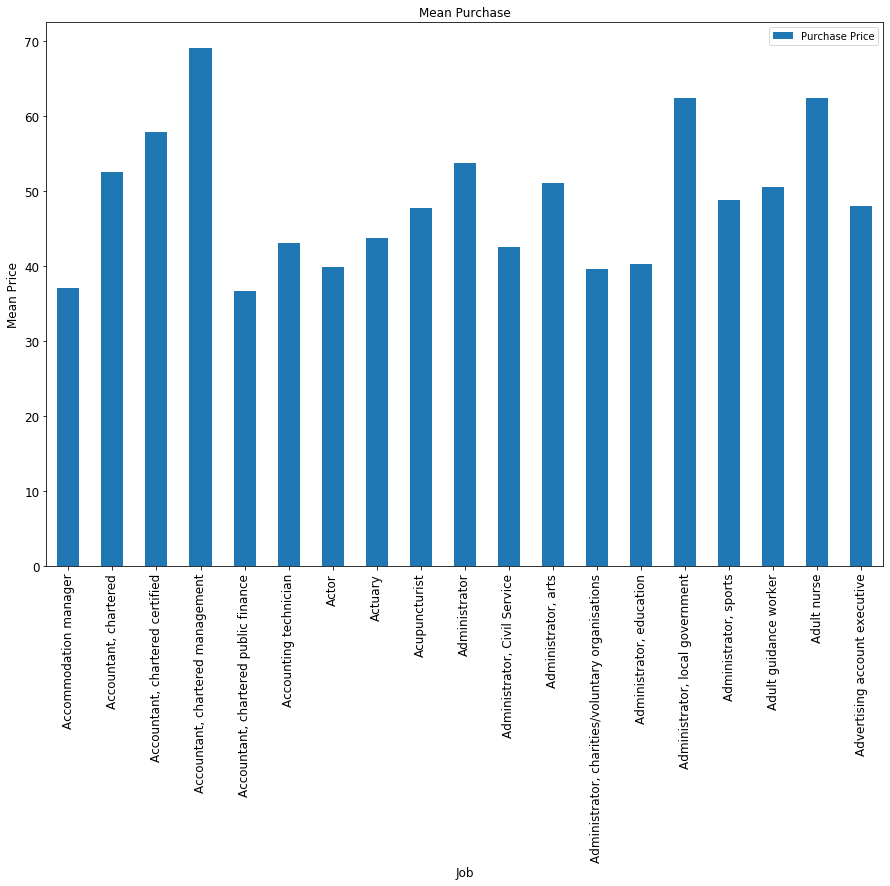

In [14]:
ax = mean_price[['Job', 'Purchase Price']][1:20].plot(kind='bar', title ="Mean Purchase", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Job", fontsize=12)
ax.set_ylabel("Mean Price", fontsize=12)
plt.show()

In [15]:
mean_price = mean_price.sort_values(by=['Purchase Price'], ascending=False)

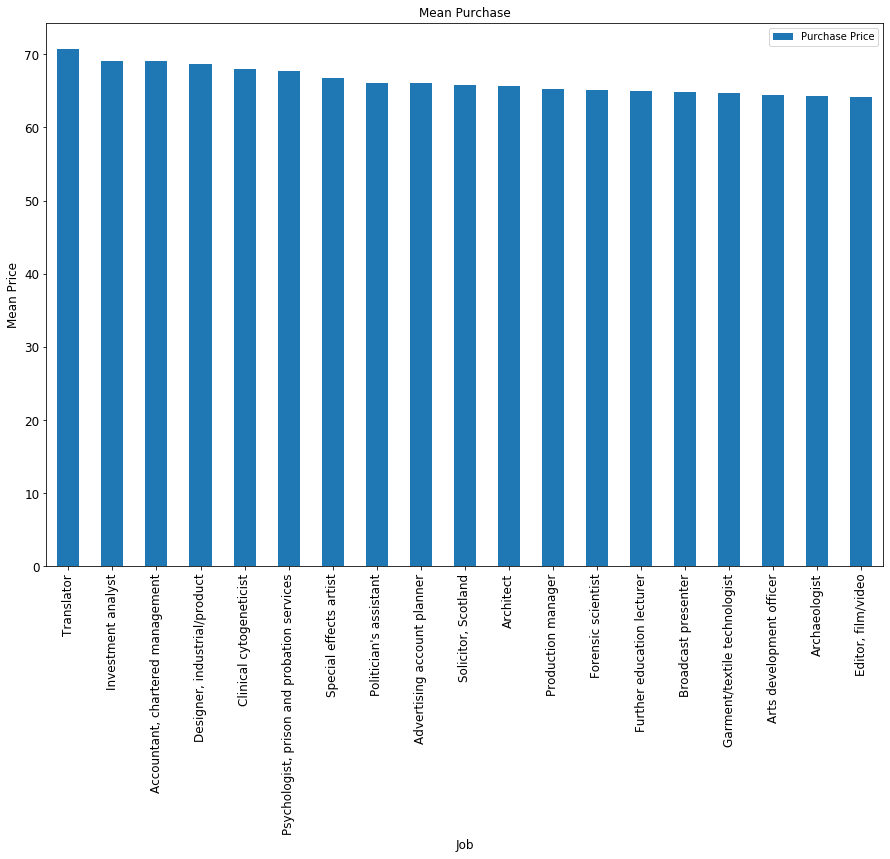

In [16]:

ax = mean_price[['Job', 'Purchase Price']][1:20].plot(kind='bar', title ="Mean Purchase", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Job", fontsize=12)
ax.set_ylabel("Mean Price", fontsize=12)
plt.show()

In [17]:
mean_price2 = df.groupby('Language').agg({
                'Purchase Price': 'mean'
            })

In [18]:
mean_price2 = mean_price2.sort_values(by=['Purchase Price'], ascending=False)

In [19]:
mean_price2

Purchase Price
Language                
el             51.555356
pt             51.215546
en             51.103015
de             50.254485
zh             50.180198
it             50.001004
ru             49.927134
fr             49.476718
es             49.366977

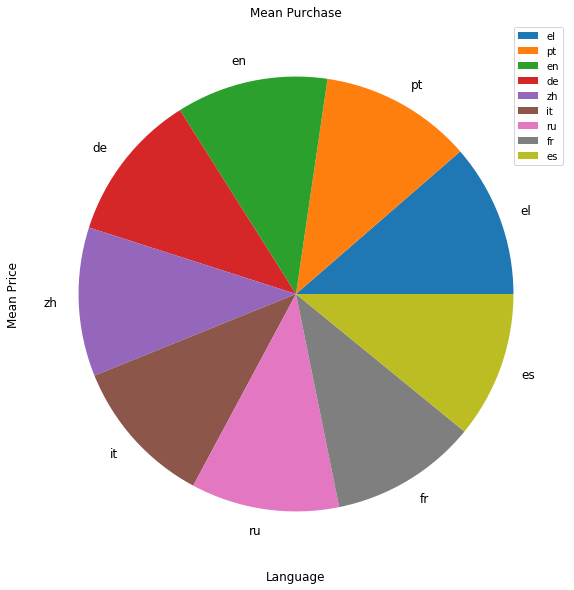

In [20]:
mean_price2['Lang'] = mean_price2.index
ax = mean_price2[['Lang', 'Purchase Price']].plot(kind='pie', y= "Purchase Price", title ="Mean Purchase", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Language", fontsize=12)
ax.set_ylabel("Mean Price", fontsize=12)
plt.show()

# Join

In [21]:
lang = pd.DataFrame({
    "abb": ['el', 'pt', 'en', 'de', 'zh', 'it', 'ru', 'fr', 'es'],
    "real": ["Greek","Portugees","English", "German", "Chinese", "Italian", "Russian", "French", "Spanish"]
})

In [22]:
lang

abb       real
0  el      Greek
1  pt  Portugees
2  en    English
3  de     German
4  zh    Chinese
5  it    Italian
6  ru    Russian
7  fr     French
8  es    Spanish

In [23]:
df.merge(lang, left_on='Language', right_on='abb', how='left')

Address    Lot AM or PM  \
0     16629 Pace Camp Apt. 448\nAlexisborough, NE 77...  46 in       PM   
1     9374 Jasmine Spurs Suite 508\nSouth John, TN 8...  28 rn       PM   
2                      Unit 0065 Box 5052\nDPO AP 27450  94 vE       PM   
3                 7780 Julia Fords\nNew Stacy, WA 45798  36 vm       PM   
4     23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...  20 IE       AM   
...                                                 ...    ...      ...   
9995      966 Castaneda Locks\nWest Juliafurt, CO 96415  92 XI       PM   
9996  832 Curtis Dam Suite 785\nNorth Edwardburgh, T...  41 JY       AM   
9997              Unit 4434 Box 6343\nDPO AE 28026-0283  74 Zh       AM   
9998               0096 English Rest\nRoystad, IA 12457  74 cL       PM   
9999     40674 Barrett Stravenue\nGrimesville, WI 79682  64 Hr       AM   

                                           Browser Info  \
0     Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...   
1     Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...   
2     Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...   
3     Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...   
4     Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...   
...                                                 ...   
9995  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/5352 ...   
9996  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...   
9997  Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...   
9998  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_8;...   
9999  Mozilla/5.0 (X11; Linux i686; rv:1.9.5.20) Gec...   

                              Company       Credit Card CC Exp Date  \
0                     Martinez-Herman  6011929061123406       02/20   
1     Fletcher, Richards and Whitaker  3337758169645356       11/18   
2          Simpson, Williams and Pham      675957666125       08/19   
3     Williams, Marshall and Buchanan  6011578504430710       02/24   
4           Brown, Watson and Andrews  6011456623207998       10/25   
...                               ...               ...         ...   
9995                    Randall-Sloan   342945015358701       03/22   
9996         Hale, Collins and Wilson   210033169205009       07/25   
9997                     Anderson Ltd  6011539787356311       05/21   
9998                         Cook Inc   180003348082930       11/17   
9999                       Greene Inc  4139972901927273       02/19   

      CC Security Code                  CC Provider  \
0                  900                 JCB 16 digit   
1                  561                   Mastercard   
2                  699                 JCB 16 digit   
3                  384                     Discover   
4                  678  Diners Club / Carte Blanche   
...                ...                          ...   
9995               838                 JCB 15 digit   
9996               207                 JCB 16 digit   
9997                 1                VISA 16 digit   
9998               987             American Express   
9999               302                 JCB 15 digit   

                               Email                                     Job  \
0                  pdunlap@yahoo.com  Scientist, product/process development   
1                 anthony41@reed.com                       Drilling engineer   
2     amymiller@morales-harrison.com                Customer service manager   
3        brent16@olson-robinson.info                       Drilling engineer   
4        christopherwright@gmail.com                             Fine artist   
...                              ...                                     ...   
9995          iscott@wade-garner.com                              Printmaker   
9996              mary85@hotmail.com                         Energy engineer   
9997               tyler16@gmail.com                      Veterinary surgeon   
9998         elizabethmoore@reid.net                Local government officer   
9999           rachelford@vaughn.com        